In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
!pwd

/Users/josephdown/Aid Data Project


In [32]:
df = pd.read_csv("aiddata-countries-only.csv")



In [33]:
df.head()



,Unnamed: 0,aiddata_id,aiddata_2_id,year,donor,recipient,commitment_amount_usd_constant,coalesced_purpose_code,coalesced_purpose_name
0,1,2414478.0,NaN,1977,Saudi Arabia,India,348718518.0,23030,Power generation/renewable sources
1,2,2414509.0,NaN,1977,Saudi Arabia,Brazil,191647004.0,23040,Electrical transmission/ distribution
2,3,2414635.0,NaN,1983,Saudi Arabia,India,79371799.0,21030,Rail transport
3,4,2414665.0,NaN,1984,Saudi Arabia,Taiwan,212202942.0,21030,Rail transport
4,5,2414667.0,NaN,1984,Saudi Arabia,Korea,134511154.0,21040,Water transport


In [34]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [35]:
df.columns = ['ID', 'ID2', 'Year', 'Donor', 'Recipient',
       'Commitment Amount USD', 'Purpose Code',
       'Purpose Name']
       

In [36]:
df.columns


Index(['ID', 'ID2', 'Year', 'Donor', 'Recipient', 'Commitment Amount USD',
       'Purpose Code', 'Purpose Name'],
      dtype='object')

In [37]:
df.isna().sum()



ID                           0
ID2                      28845
Year                         0
Donor                        0
Recipient                    0
Commitment Amount USD        0
Purpose Code                 0
Purpose Name                 0
dtype: int64

In [38]:
df['ID2'].fillna(0,inplace=True)


In [39]:
df.isna().sum()

ID                       0
ID2                      0
Year                     0
Donor                    0
Recipient                0
Commitment Amount USD    0
Purpose Code             0
Purpose Name             0
dtype: int64

In [40]:
grouped_by_year = df.groupby('Year')['Commitment Amount USD'].describe()



In [41]:
donor_year = df.groupby(['Donor','Recipient'])

In [42]:

grouped_by_year = df.groupby('Year')['Commitment Amount USD'].describe()


In [43]:
grouped_by_year.head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1973,162.0,2.972514e+07,5.916321e+07,5899.0,275787.5,7303354.5,31518440.50,495825145.0
1974,178.0,3.823280e+07,7.179023e+07,7503.0,872773.5,6264992.0,31923989.50,433456926.0
1975,125.0,3.401040e+07,6.177236e+07,1508.0,690731.0,10392556.0,33085582.00,410710395.0
1976,164.0,2.253547e+07,5.310931e+07,34087.0,456414.0,4277345.0,19190903.25,471308161.0
1977,213.0,2.313618e+07,5.618360e+07,15418.0,358699.0,2668718.0,19418880.00,520403470.0


In [44]:
grouped_by_year['Year']=grouped_by_year.index

In [45]:
grouped_by_year.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Year'], dtype='object')

In [46]:
grouped_by_year.columns=['Count','Mean','Standard Deviation','Min','25%','50%','75%','Max','Year']

In [47]:
grouped_by_year

,Count,Mean,Standard Deviation,Min,25%,50%,75%,Max,Year
Year,,,,,,,,,
1973,162.0,2.972514e+07,5.916321e+07,5899.0,275787.50,7303354.5,31518440.50,4.958251e+08,1973
1974,178.0,3.823280e+07,7.179023e+07,7503.0,872773.50,6264992.0,31923989.50,4.334569e+08,1974
1975,125.0,3.401040e+07,6.177236e+07,1508.0,690731.00,10392556.0,33085582.00,4.107104e+08,1975
1976,164.0,2.253547e+07,5.310931e+07,34087.0,456414.00,4277345.0,19190903.25,4.713082e+08,1976
1977,213.0,2.313618e+07,5.618360e+07,15418.0,358699.00,2668718.0,19418880.00,5.204035e+08,1977
1978,170.0,2.822892e+07,5.934964e+07,1345.0,338260.50,2370940.0,21477862.75,4.664728e+08,1978
1979,192.0,1.725547e+07,3.950543e+07,5797.0,371492.75,2399604.5,12255907.75,3.167048e+08,1979
1980,299.0,3.707280e+07,9.834643e+07,14868.0,1544829.00,9173055.0,39203010.50,1.196452e+09,1980
1981,351.0,3.964371e+07,1.415619e+08,8764.0,913910.50,6134247.0,33592085.50,2.295950e+09,1981


In [48]:
#sns.load_dataset("aiddata-countries-only")


In [49]:
#sns.lmplot(x='Year', y='Commitment Amount USD', data=df)

Text(0.5, 1.0, 'Average Donation Amount in Tens of Millions')

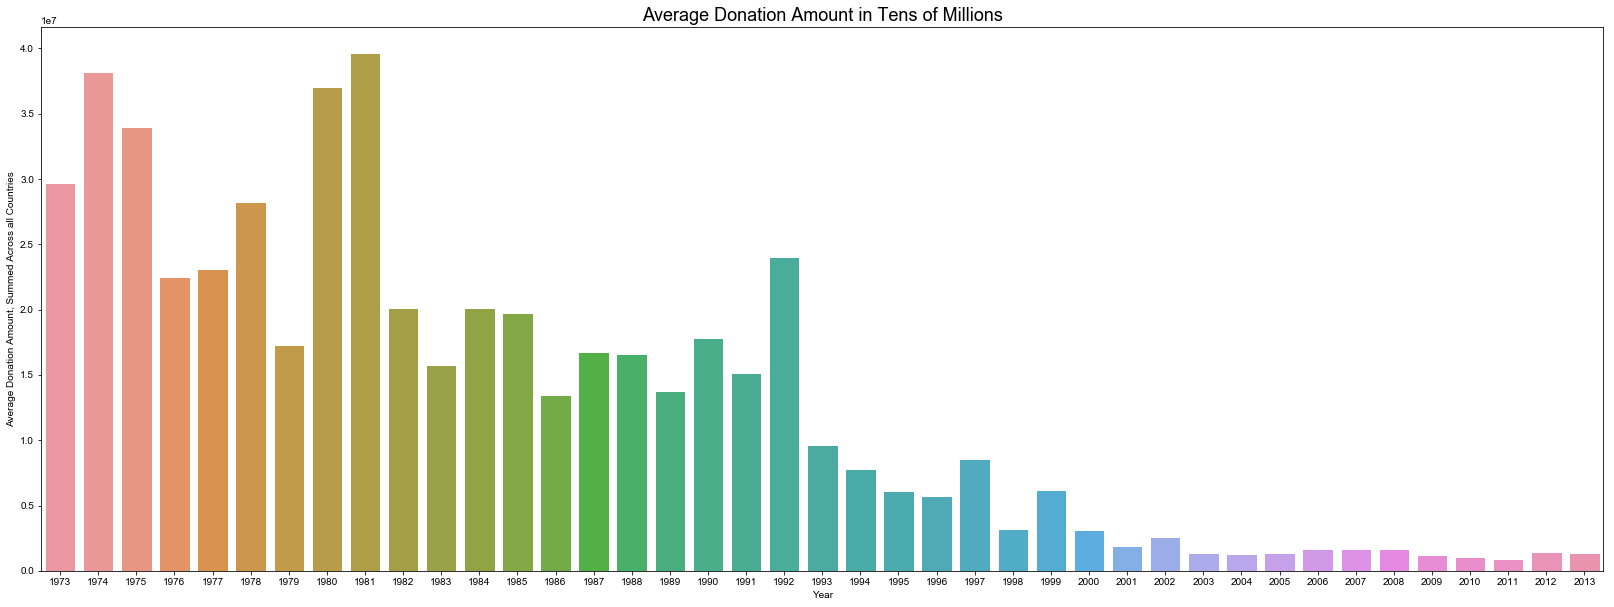

In [50]:
fig, ax = plt.subplots(figsize=(28,10))
sns.set(font_scale=1.5)
sns.barplot(x='Year', y='Mean', data=grouped_by_year)
ax.set_ylabel('Average Donation Amount, Summed Across all Countries')
ax.set_title('Average Donation Amount in Tens of Millions')

#This bar graph shows the average donation amount per year across all countries

In [51]:
by_donor = df.groupby('Donor')['Commitment Amount USD'].describe()


In [52]:
by_donor['Donor']=by_donor.index



In [53]:
by_donor.sort_values(by='mean', ascending=True, inplace=True)


In [54]:
by_donor[-20:].tail(3)



,count,mean,std,min,25%,50%,75%,max,Donor
Donor,,,,,,,,,
Japan,9399.0,1.214834e+07,8.195455e+07,8.0,19737.0,79215.0,446940.5,5.037350e+09,Japan
Kuwait,25.0,5.476313e+07,5.130710e+07,1107033.0,21381183.0,30606432.0,72911163.0,1.935889e+08,Kuwait
Saudi Arabia,13.0,1.306470e+08,8.196248e+07,35996220.0,79371799.0,112421249.0,134511154.0,3.487185e+08,Saudi Arabia


Text(0.5, 1.0, 'Top 15 Donor Countries from 1973 to 2013')

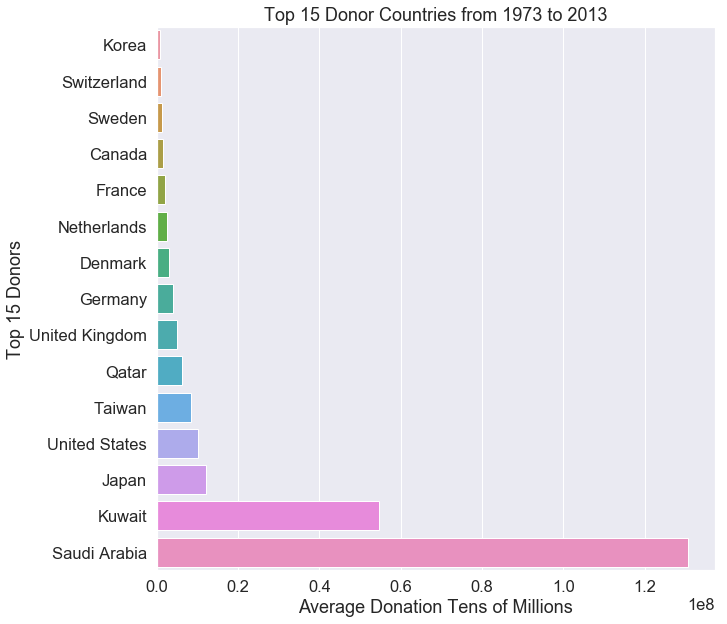

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='mean', y='Donor', data=by_donor[-15:])
ax.set_ylabel('Top 15 Donors')
ax.set_xlabel('Average Donation Tens of Millions')
ax.set_title('Top 15 Donor Countries from 1973 to 2013')

#This bar plot shows the Top 15 Donor Countries from 1973 to 2013


###### donor_year.head(1)


In [56]:
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# ax = sns.scatterplot(x="Year", y="Commitment Amount USD",
#                      hue="Donor", size="Commitment Amount USD",
#                      palette=cmap, sizes=(10, 200),
#                      data=donor_year)

In [62]:
df.head()



,ID,ID2,Year,Donor,Recipient,Commitment Amount USD,Purpose Code,Purpose Name
0,2414478.0,0.0,1977,Saudi Arabia,India,348718518.0,23030,Power generation/renewable sources
1,2414509.0,0.0,1977,Saudi Arabia,Brazil,191647004.0,23040,Electrical transmission/ distribution
2,2414635.0,0.0,1983,Saudi Arabia,India,79371799.0,21030,Rail transport
3,2414665.0,0.0,1984,Saudi Arabia,Taiwan,212202942.0,21030,Rail transport
4,2414667.0,0.0,1984,Saudi Arabia,Korea,134511154.0,21040,Water transport


In [63]:
df.columns

Index(['ID', 'ID2', 'Year', 'Donor', 'Recipient', 'Commitment Amount USD',
       'Purpose Code', 'Purpose Name'],
      dtype='object')

In [92]:
rd_metrics = df.groupby('Recipient')['Donor','Recipient','Commitment Amount USD'].describe()

In [96]:
rd_metrics['Recipient']=rd_metrics.index

In [108]:
rd_metrics.head()

Commitment Amount USD                                          \
                          count          mean           std         min   
Recipient                                                                 
Australia                  28.0  9.187922e+07  1.468330e+08    691468.0   
Austria                    12.0  6.418895e+07  8.294585e+07      1508.0   
Belgium                     2.0  9.217312e+07  7.876517e+07  36477733.0   
Brazil                  15853.0  2.309169e+06  2.702370e+07         1.0   
Canada                     21.0  1.937454e+08  4.975998e+08     55468.0   

                                                                Recipient  \
                   25%         50%           75%           max              
Recipient                                                                   
Australia  13555538.75  39631155.5  9.251622e+07  6.968829e+08  Australia   
Austria       49727.50  29377294.0  9.243282e+07  2.494287e+08    Austria   
Belgium    64325424.75  92173116.5  1.200208e+08  1.478685e+08    Belgium   
Brazil        16466.00     64792.0  2.481710e+05  1.968117e+09     Brazil   
Canada     24214585.00  61860879.0  8.686570e+07  2.295950e+09     Canada   

               Donor  
                      
Recipient             
Australia  Australia  
Austria      Austria  
Belgium      Belgium  
Brazil        Brazil  
Canada        Canada

In [109]:
rd_metrics.size

450

In [126]:
df.groupby('Recipient')['Donor','Year'].describe().columns


MultiIndex(levels=[['Year'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]])

In [103]:
rd_metrics['Donor']=df.groupby('Recipient')['Donor'].describe().index


In [124]:
rd_metrics.columns

MultiIndex(levels=[['Commitment Amount USD', 'Recipient', 'Donor'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 8]])

In [129]:
df.columns

Index(['ID', 'ID2', 'Year', 'Donor', 'Recipient', 'Commitment Amount USD',
       'Purpose Code', 'Purpose Name'],
      dtype='object')

In [159]:
rd = df.sort_values('Commitment Amount USD', ascending=False)[['Recipient','Donor','Year','Commitment Amount USD']]

In [170]:
rd['Commitment Amount USD'].describe()

count    9.854000e+04
mean     3.722388e+06
std      4.991101e+07
min     -5.561900e+04
25%      1.895400e+04
50%      8.296200e+04
75%      3.734770e+05
max      7.727368e+09
Name: Commitment Amount USD, dtype: float64

In [175]:
rd_upper_50 = rd.loc[rd['Commitment Amount USD']>=8.29e+04]

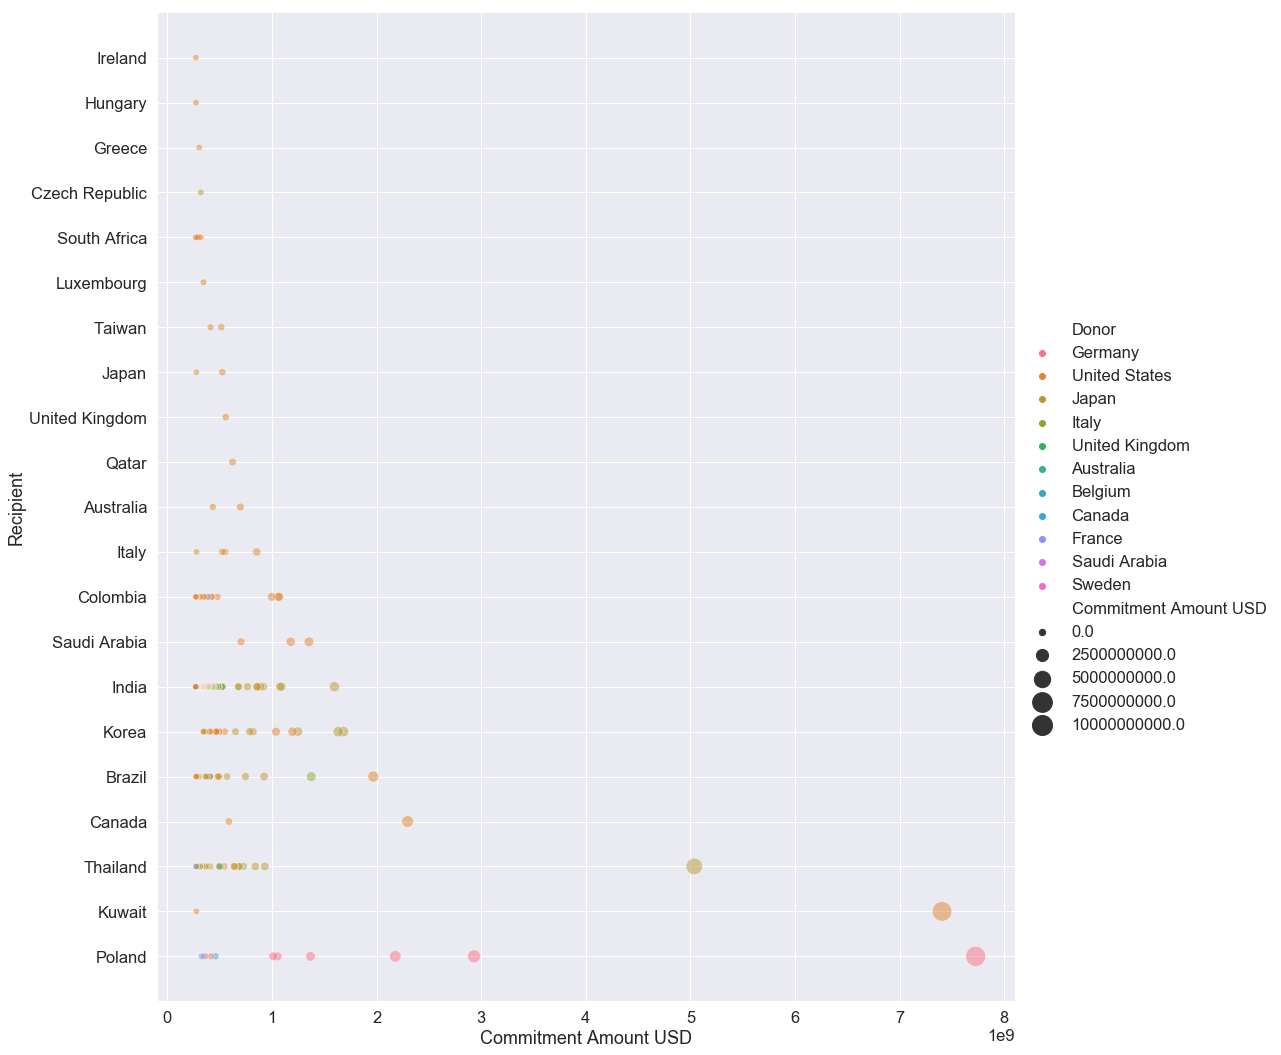

In [183]:
### 

fig = sns.relplot(x="Commitment Amount USD", y="Recipient", hue="Donor", size="Commitment Amount USD",
            sizes=(40, 400), alpha=.5, #palette="muted",
            height=15, data=rd_upper_50[:200])


# ax.set_ylabel('Top 15 Donors')
# ax.set_xlabel('Average Donation Tens of Millions')
# ax.set_title('Top 15 Donor Countries from 1973 to 2013')
